In [4]:
import os
import shutil
import yaml
from pathlib import Path
from tqdm import tqdm

class YOLODatasetFilter:
    def __init__(self, dataset_path):
        """
        Initialize the filter with the path to the YOLO dataset
        dataset_path should contain:
        - images/ folder
        - labels/ folder
        - data.yaml file
        """
        self.dataset_path = Path(dataset_path)
        self.images_path = self.dataset_path / 'train' / 'images'
        self.labels_path = self.dataset_path / 'train' / 'labels'
        self.yaml_path = self.dataset_path / 'data.yaml'
        
        # Load class mapping from yaml file
        with open(self.yaml_path, 'r') as f:
            self.yaml_data = yaml.safe_load(f)
            self.original_classes = self.yaml_data['names']
    
    def create_filtered_dataset(self, selected_classes, output_path):
        """
        Create a new dataset with only the selected classes
        """
        output_path = Path(output_path)
        
        # Create output directories
        output_images = output_path / 'images'
        output_labels = output_path / 'labels'
        os.makedirs(output_images, exist_ok=True)
        os.makedirs(output_labels, exist_ok=True)
        
        # Create mapping from old to new class indices
        old_to_new_idx = {}
        for new_idx, class_name in enumerate(selected_classes):
            if class_name in self.original_classes:
                old_idx = self.original_classes.index(class_name)
                old_to_new_idx[old_idx] = new_idx
            else:
                print(f"Warning: Class '{class_name}' not found in original dataset")
        
        # Process each label file
        processed_files = 0
        skipped_files = 0
        label_files = list(self.labels_path.glob('*.txt'))
        
        print("Processing files...")
        for label_file in tqdm(label_files):
            image_name = label_file.stem
            
            # Check for corresponding image file (supports multiple extensions)
            image_file = None
            for ext in ['.jpg', '.jpeg', '.png']:
                temp_image_file = self.images_path / f"{image_name}{ext}"
                if temp_image_file.exists():
                    image_file = temp_image_file
                    break
            
            if not image_file:
                print(f"Warning: No image found for {label_file.name}")
                continue
            
            # Read and filter label file
            with open(label_file, 'r') as f:
                lines = f.readlines()
            
            new_lines = []
            has_selected_classes = False
            
            for line in lines:
                parts = line.strip().split()
                if not parts:
                    continue
                    
                old_class_idx = int(parts[0])
                
                if old_class_idx in old_to_new_idx:
                    # Replace old class index with new one
                    parts[0] = str(old_to_new_idx[old_class_idx])
                    new_lines.append(' '.join(parts) + '\n')
                    has_selected_classes = True
            
            # Only copy files if they contain selected classes
            if has_selected_classes:
                # Copy image
                shutil.copy2(image_file, output_images / image_file.name)
                
                # Save new label file
                with open(output_labels / label_file.name, 'w') as f:
                    f.writelines(new_lines)
                processed_files += 1
            else:
                skipped_files += 1
        
        # Create new yaml file
        new_yaml = {
            'path': str(output_path.absolute()),
            'train': str(output_images.absolute()),
            'val': str(output_images.absolute()),  # You might want to modify this
            'names': selected_classes
        }
        
        with open(output_path / 'data.yaml', 'w') as f:
            yaml.dump(new_yaml, f, sort_keys=False)
        
        print(f"\nDataset filtering complete:")
        print(f"- Processed files: {processed_files}")
        print(f"- Skipped files: {skipped_files}")
        print(f"- Original classes: {len(self.original_classes)}")
        print(f"- Selected classes: {len(selected_classes)}")
        print(f"\nNew dataset saved to: {output_path}")

# ตัวอย่างการใช้งาน
selected_classes = [
    "Aluminium foil",
    "Broken glass",
    "Clear plastic bottle",
    "Corrugated carton",
    "Disposable plastic cup",
    "Drink can",
    "Glass bottle",
    "Metal bottle cap",
    "Normal paper",
    "Other carton",
    "Other plastic",
    "Other plastic wrapper",
    "Paper cup",
    "Plastic bottle cap",
    "Plastic film",
    "Plastic lid",
    "Plastic straw",
    "Pop tab",
    "Single-use carrier bag",
    "Styrofoam piece"
]

# สร้าง instance ของ class filter
filter = YOLODatasetFilter("")

# สร้างชุดข้อมูลใหม่
filter.create_filtered_dataset(selected_classes, "filter/train/dataset")

Processing files...


100%|██████████████████████████████████████████████████████████████████████████████| 3147/3147 [00:51<00:00, 61.29it/s]


Dataset filtering complete:
- Processed files: 2745
- Skipped files: 402
- Original classes: 59
- Selected classes: 20

New dataset saved to: filter\train\dataset


In [5]:
import os
import shutil
import yaml
from pathlib import Path
from tqdm import tqdm

class YOLODatasetFilter:
    def __init__(self, dataset_path):
        """
        Initialize the filter with the path to the YOLO dataset
        dataset_path should contain:
        - images/ folder
        - labels/ folder
        - data.yaml file
        """
        self.dataset_path = Path(dataset_path)
        self.images_path = self.dataset_path / 'valid' / 'images'
        self.labels_path = self.dataset_path / 'valid' / 'labels'
        self.yaml_path = self.dataset_path / 'data.yaml'
        
        # Load class mapping from yaml file
        with open(self.yaml_path, 'r') as f:
            self.yaml_data = yaml.safe_load(f)
            self.original_classes = self.yaml_data['names']
    
    def create_filtered_dataset(self, selected_classes, output_path):
        """
        Create a new dataset with only the selected classes
        """
        output_path = Path(output_path)
        
        # Create output directories
        output_images = output_path / 'images'
        output_labels = output_path / 'labels'
        os.makedirs(output_images, exist_ok=True)
        os.makedirs(output_labels, exist_ok=True)
        
        # Create mapping from old to new class indices
        old_to_new_idx = {}
        for new_idx, class_name in enumerate(selected_classes):
            if class_name in self.original_classes:
                old_idx = self.original_classes.index(class_name)
                old_to_new_idx[old_idx] = new_idx
            else:
                print(f"Warning: Class '{class_name}' not found in original dataset")
        
        # Process each label file
        processed_files = 0
        skipped_files = 0
        label_files = list(self.labels_path.glob('*.txt'))
        
        print("Processing files...")
        for label_file in tqdm(label_files):
            image_name = label_file.stem
            
            # Check for corresponding image file (supports multiple extensions)
            image_file = None
            for ext in ['.jpg', '.jpeg', '.png']:
                temp_image_file = self.images_path / f"{image_name}{ext}"
                if temp_image_file.exists():
                    image_file = temp_image_file
                    break
            
            if not image_file:
                print(f"Warning: No image found for {label_file.name}")
                continue
            
            # Read and filter label file
            with open(label_file, 'r') as f:
                lines = f.readlines()
            
            new_lines = []
            has_selected_classes = False
            
            for line in lines:
                parts = line.strip().split()
                if not parts:
                    continue
                    
                old_class_idx = int(parts[0])
                
                if old_class_idx in old_to_new_idx:
                    # Replace old class index with new one
                    parts[0] = str(old_to_new_idx[old_class_idx])
                    new_lines.append(' '.join(parts) + '\n')
                    has_selected_classes = True
            
            # Only copy files if they contain selected classes
            if has_selected_classes:
                # Copy image
                shutil.copy2(image_file, output_images / image_file.name)
                
                # Save new label file
                with open(output_labels / label_file.name, 'w') as f:
                    f.writelines(new_lines)
                processed_files += 1
            else:
                skipped_files += 1
        
        # Create new yaml file
        new_yaml = {
            'path': str(output_path.absolute()),
            'train': str(output_images.absolute()),
            'val': str(output_images.absolute()),  # You might want to modify this
            'names': selected_classes
        }
        
        with open(output_path / 'data.yaml', 'w') as f:
            yaml.dump(new_yaml, f, sort_keys=False)
        
        print(f"\nDataset filtering complete:")
        print(f"- Processed files: {processed_files}")
        print(f"- Skipped files: {skipped_files}")
        print(f"- Original classes: {len(self.original_classes)}")
        print(f"- Selected classes: {len(selected_classes)}")
        print(f"\nNew dataset saved to: {output_path}")

# ตัวอย่างการใช้งาน
selected_classes = [
    "Aluminium foil",
    "Broken glass",
    "Clear plastic bottle",
    "Corrugated carton",
    "Disposable plastic cup",
    "Drink can",
    "Glass bottle",
    "Metal bottle cap",
    "Normal paper",
    "Other carton",
    "Other plastic",
    "Other plastic wrapper",
    "Paper cup",
    "Plastic bottle cap",
    "Plastic film",
    "Plastic lid",
    "Plastic straw",
    "Pop tab",
    "Single-use carrier bag",
    "Styrofoam piece"
]

# สร้าง instance ของ class filter
filter = YOLODatasetFilter("")

# สร้างชุดข้อมูลใหม่
filter.create_filtered_dataset(selected_classes, "filter/valid/dataset")

Processing files...


100%|████████████████████████████████████████████████████████████████████████████████| 299/299 [00:03<00:00, 78.78it/s]


Dataset filtering complete:
- Processed files: 263
- Skipped files: 36
- Original classes: 59
- Selected classes: 20

New dataset saved to: filter\valid\dataset


In [7]:
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path

def count_classes_in_dataset(label_path, class_names):
    """
    Count the number of instances per class in the dataset.
    
    Args:
        label_path (str): Path to the labels folder.
        class_names (list): List of class names.
    
    Returns:
        dict: A dictionary with class names as keys and counts as values.
    """
    label_path = Path(label_path)
    class_counts = Counter()
    
    # Iterate through all label files
    for label_file in label_path.glob('*.txt'):
        with open(label_file, 'r') as f:
            lines = f.readlines()
        
        for line in lines:
            class_idx = int(line.split()[0])
            class_counts[class_idx] += 1
    
    # Map indices to class names
    return {class_names[idx]: count for idx, count in class_counts.items()}


In [48]:
import matplotlib.pyplot as plt
from collections import Counter
from pathlib import Path
import seaborn as sns

def plot_class_distribution_sorted(class_counts):
    """
    Plot a bar chart showing the distribution of classes sorted by count (descending).
    
    Args:
        class_counts (dict): A dictionary with class names as keys and counts as values.
    """
    # Sort class counts by descending order
    sorted_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))
    
    # Generate colors for each bar
    colors = colors = sns.color_palette("pastel", len(sorted_counts))
    
    # Plot
    plt.figure(figsize=(20, 15))
    plt.bar(sorted_counts.keys(), sorted_counts.values(), color=colors, width=0.95)
    plt.xlabel("Class Name",fontsize=22)
    plt.ylabel("Number of Instances",fontsize=22)
    plt.title("Class Distribution in Filtered Dataset (Sorted by Count)",fontsize=22)
    plt.xticks(rotation=90, fontsize=20)  # เพิ่มขนาดฟอนต์ของชื่อ class
    plt.yticks(fontsize=20)  # เพิ่มขนาดฟอนต์แกน Y
    plt.tight_layout()
    plt.show()


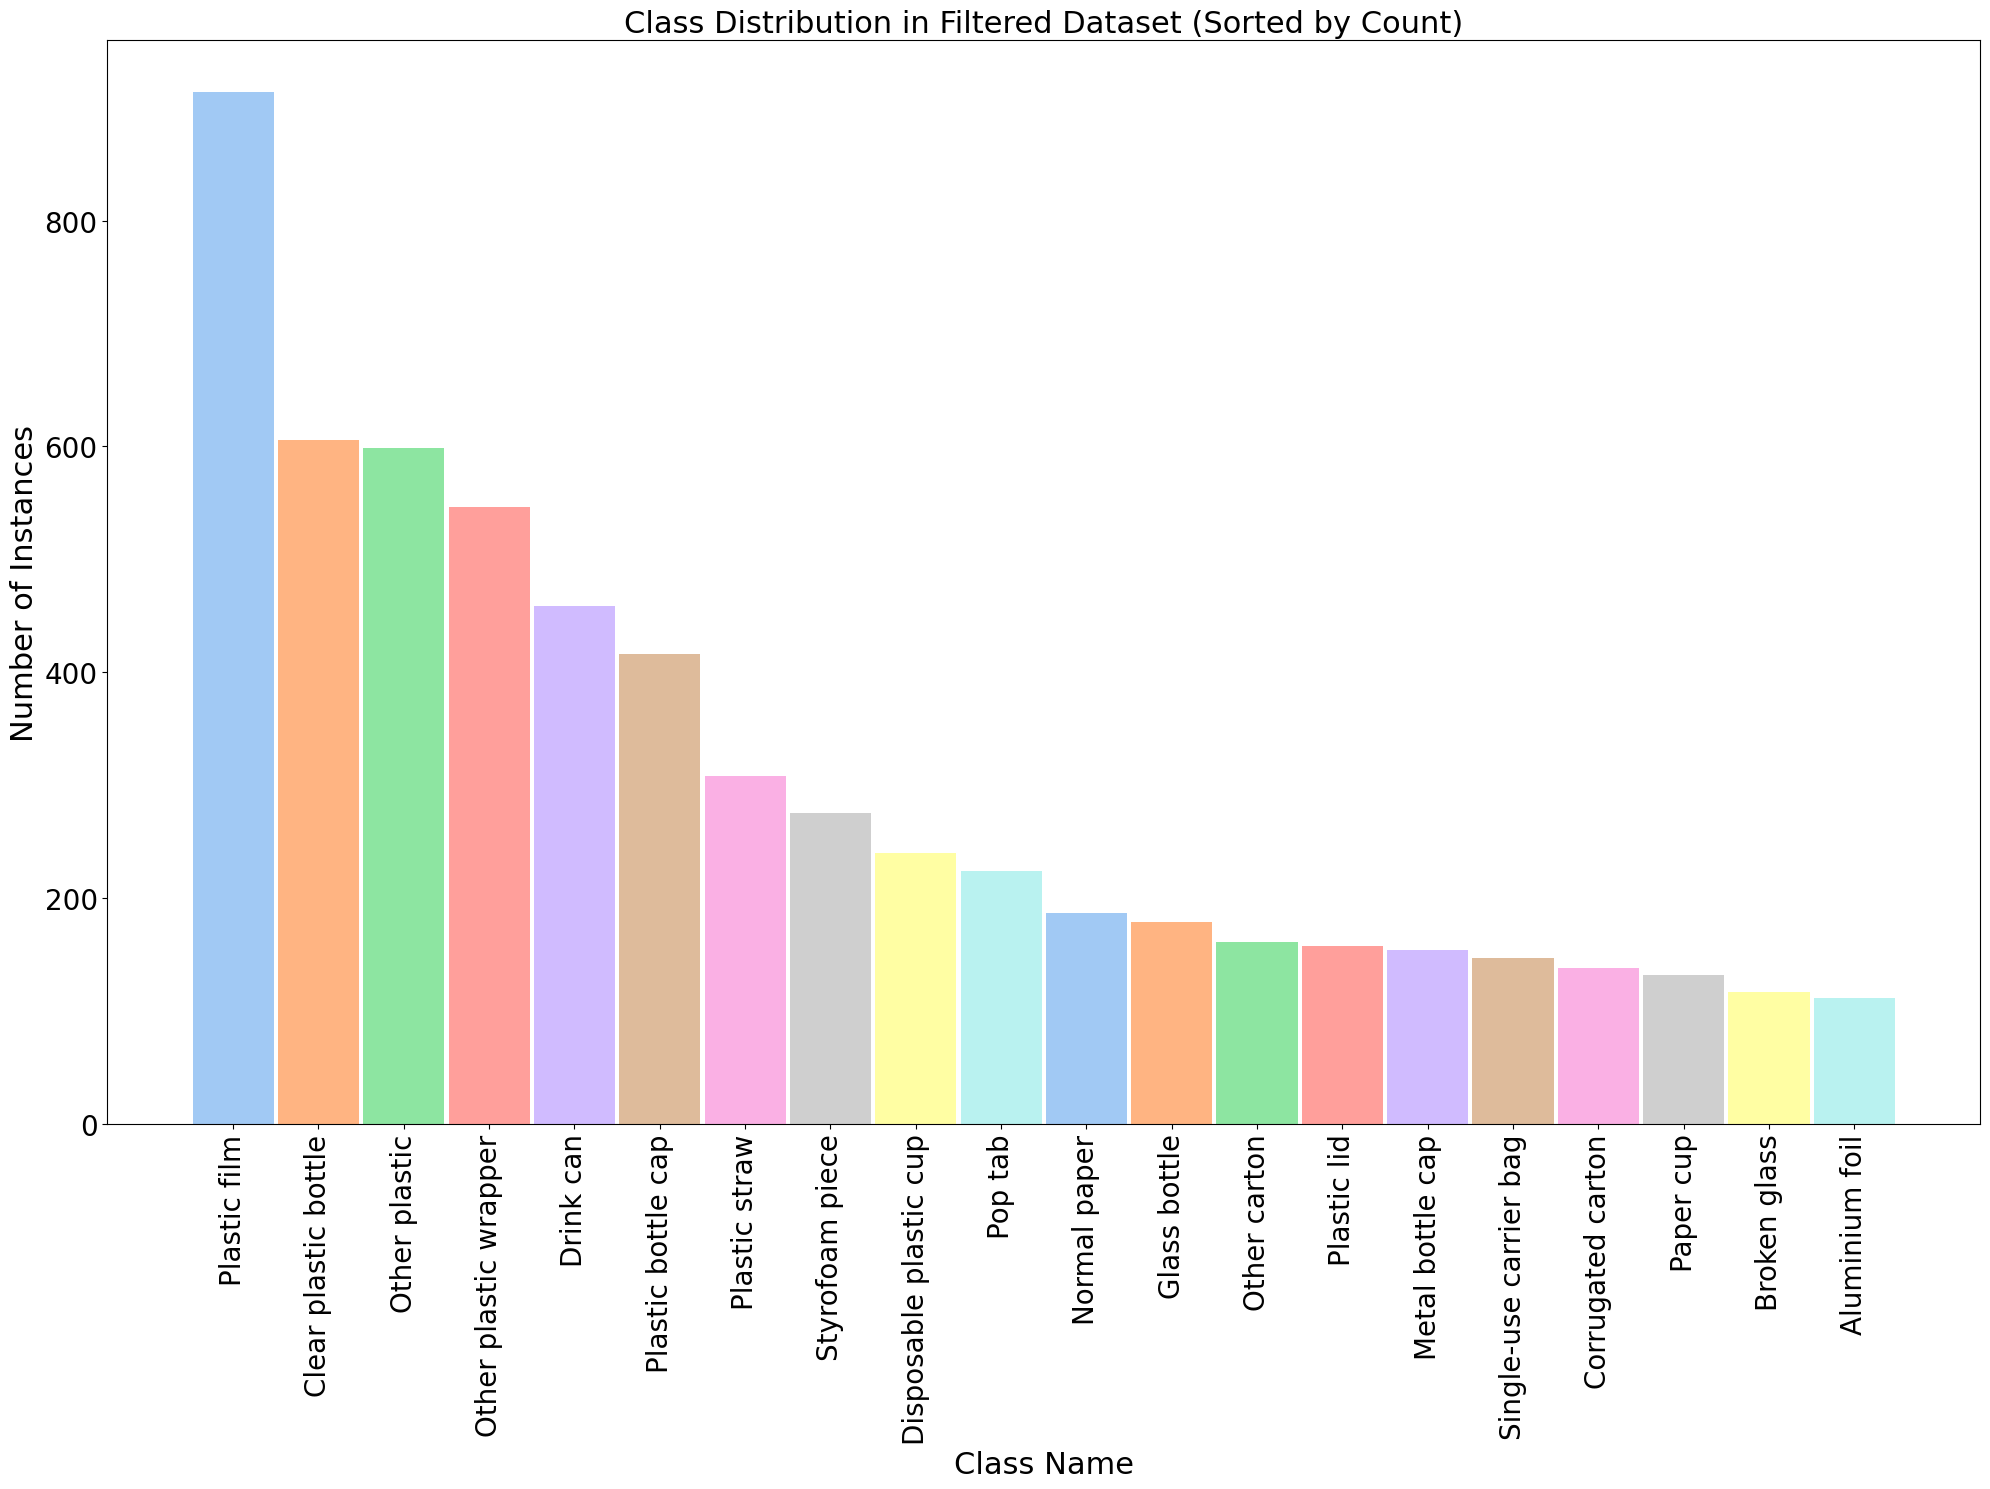

In [49]:
# Path ไปยังโฟลเดอร์ labels ของชุดข้อมูลที่ filter
filtered_labels_path = "filter/train/dataset/labels"

# นับจำนวนข้อมูลในแต่ละ class
class_counts = count_classes_in_dataset(filtered_labels_path, selected_classes)

# สร้างกราฟแสดงข้อมูลโดยเรียงลำดับจากมากไปน้อย
plot_class_distribution_sorted(class_counts)
